   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

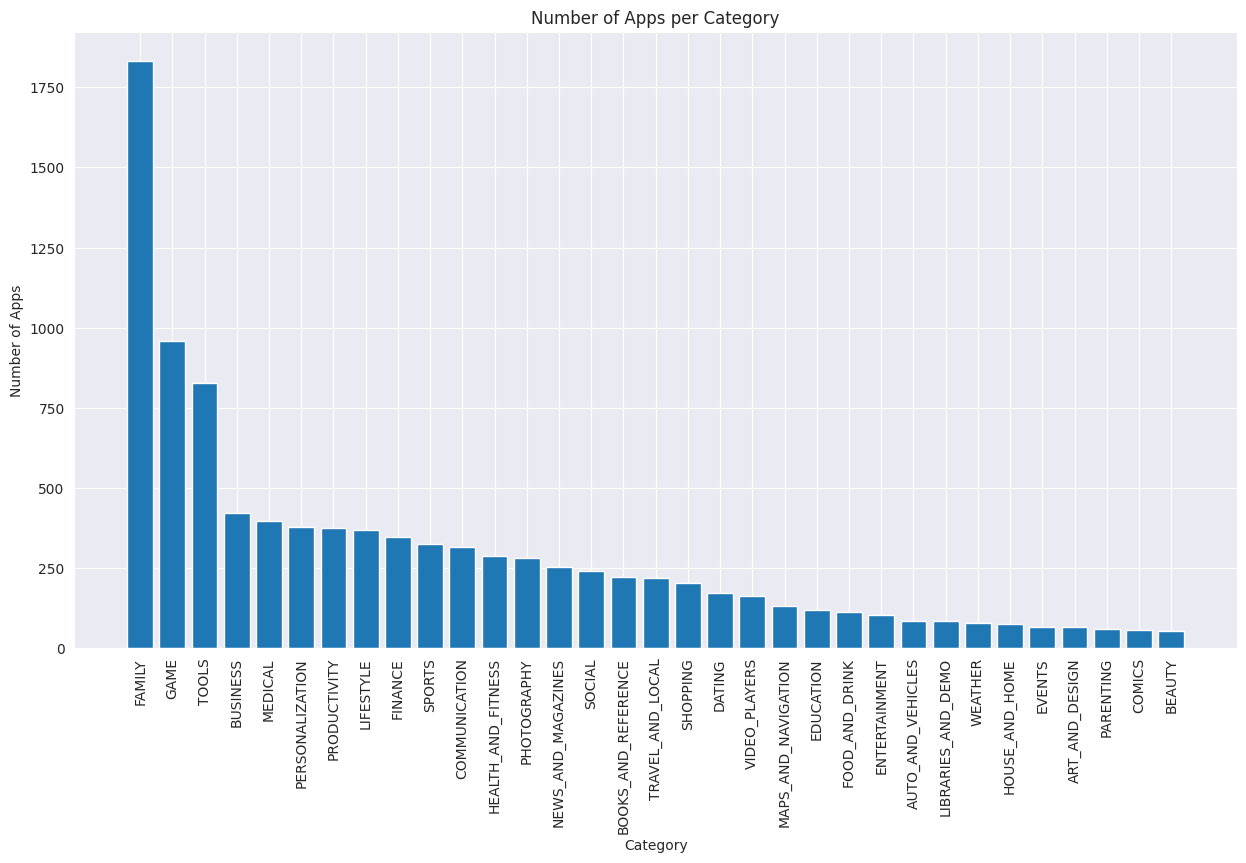

Average app rating =  4.173243045387994


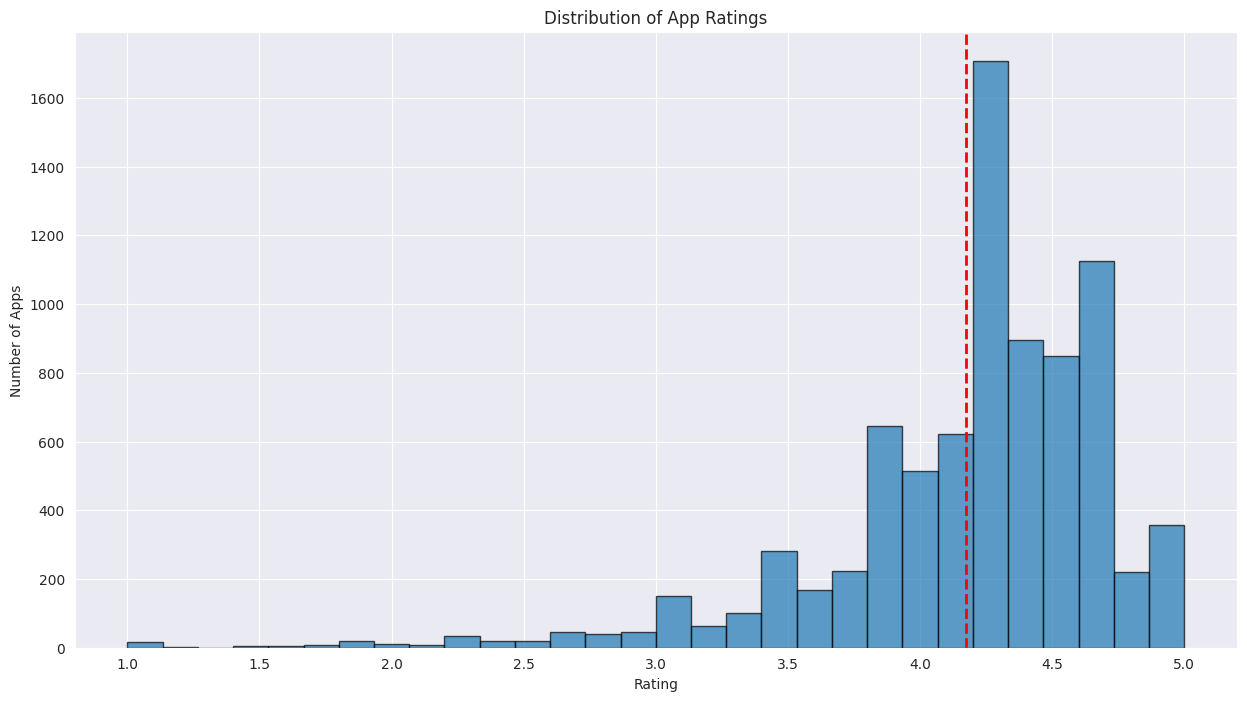

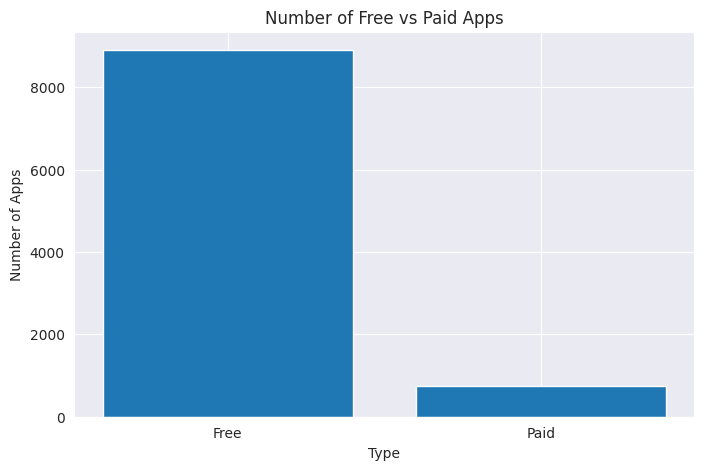

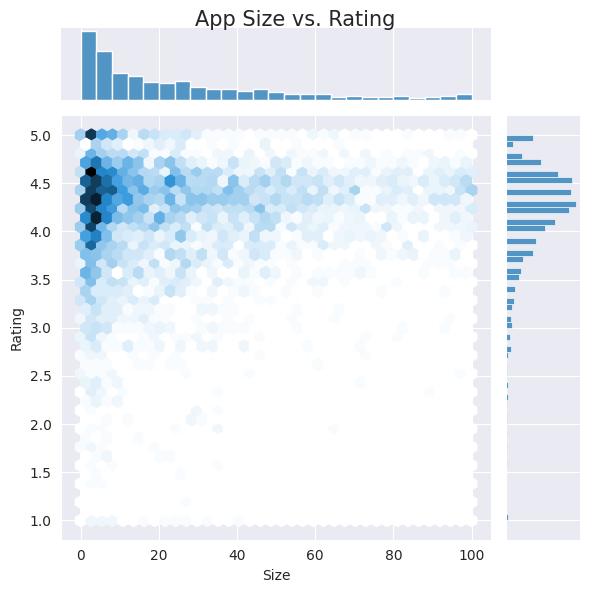

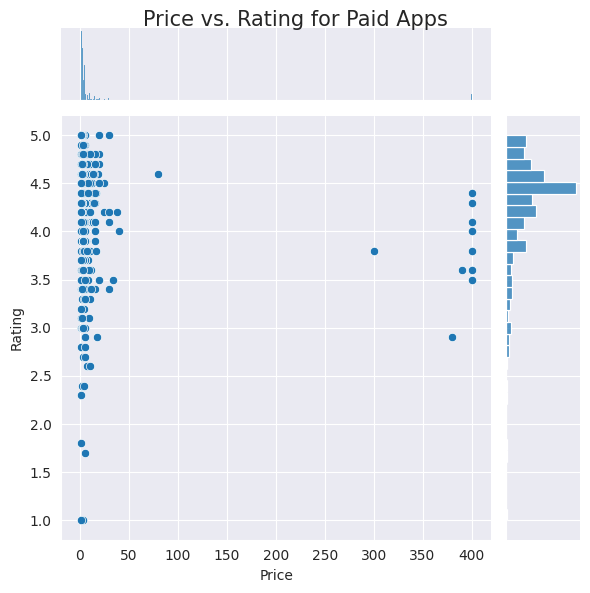

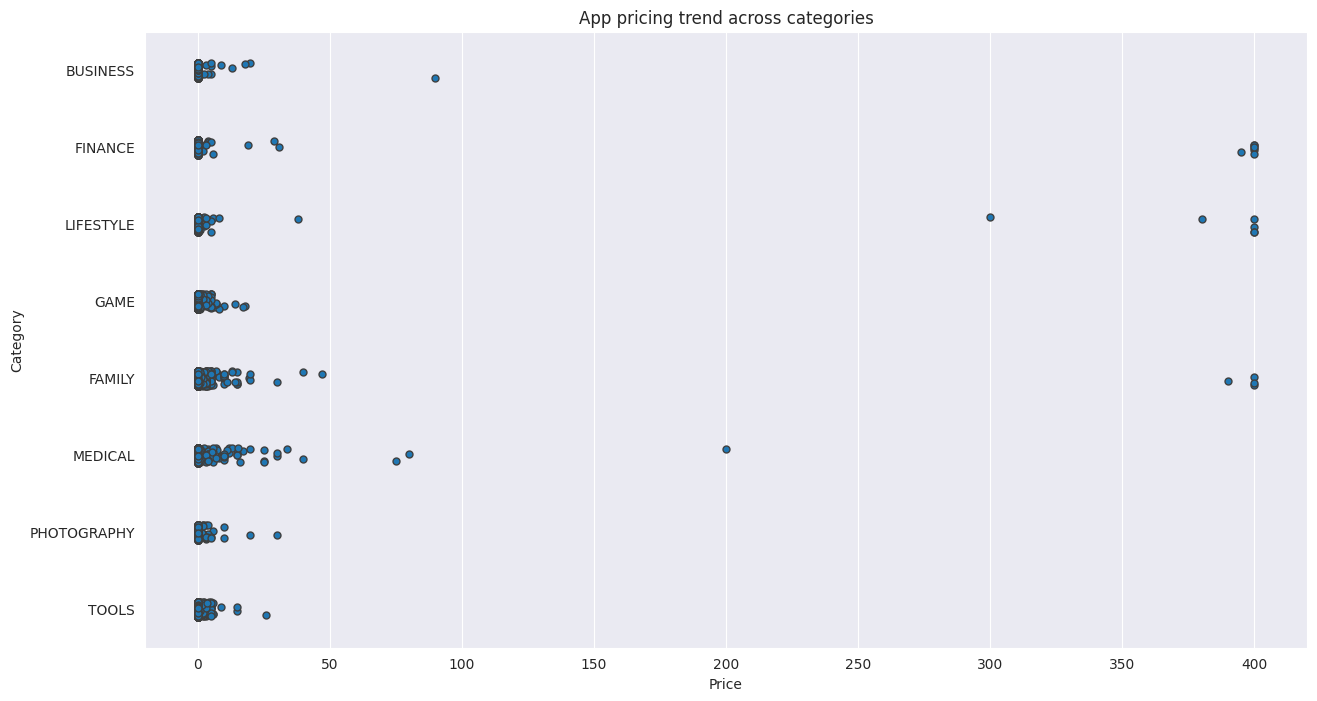

       Category                                App   Price
3327     FAMILY             most expensive app (H)  399.99
3465  LIFESTYLE                         💎 I'm rich  399.99
3469  LIFESTYLE           I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                          I am rich  399.99
4398     FAMILY                     I am Rich Plus  399.99
4399  LIFESTYLE                      I am rich VIP  299.99
4400    FINANCE                  I Am Rich Premium  399.99
4401  LIFESTYLE                I am extremely Rich  379.99
4402    FINANCE                         I am Rich!  399.99
4403    FINANCE                 I am rich(premium)  399.99
4406     FAMILY                      I Am Rich Pro  399.99
4408    FINANCE     I am rich (Most expensive app)  399.99
4410     FAMILY                          I Am Rich  389.99
4413    FINANCE                          I am Rich  399.99
4417    FINANCE                 I AM RICH PRO PLUS  399.99
8763    FINANCE                        Eu Sou Rico  394.

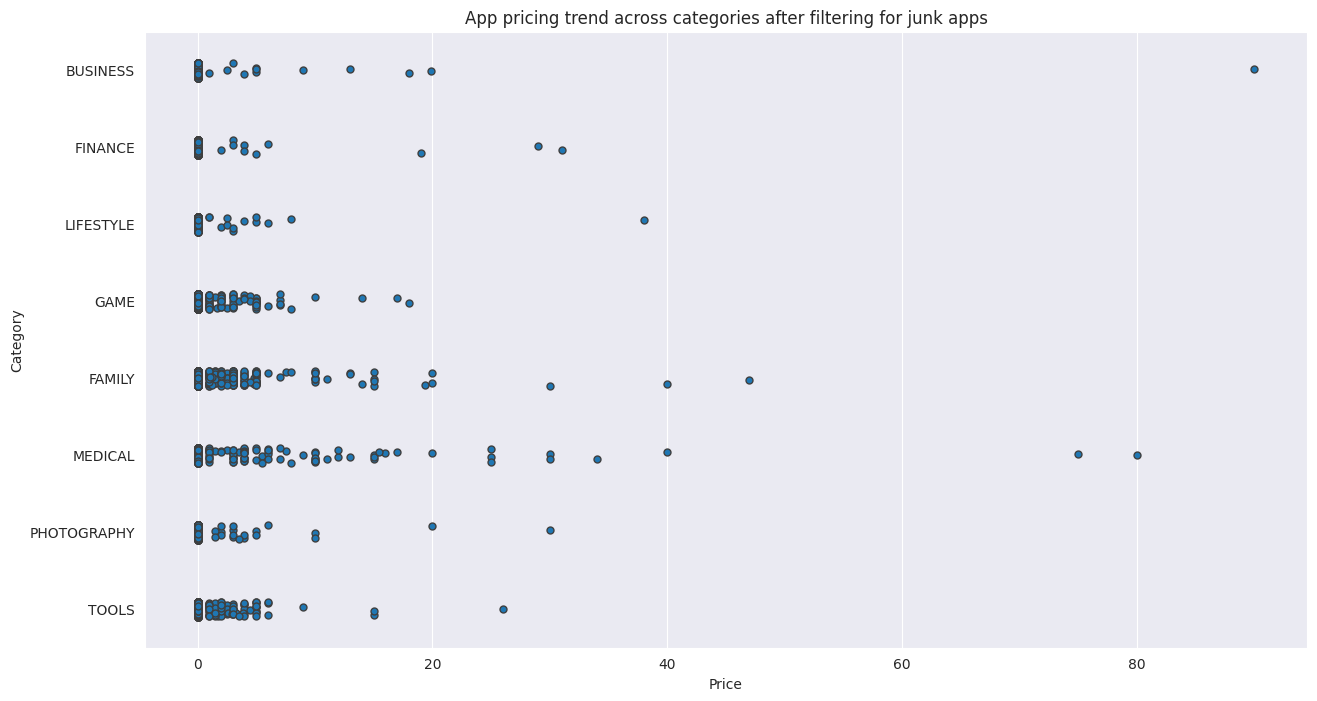

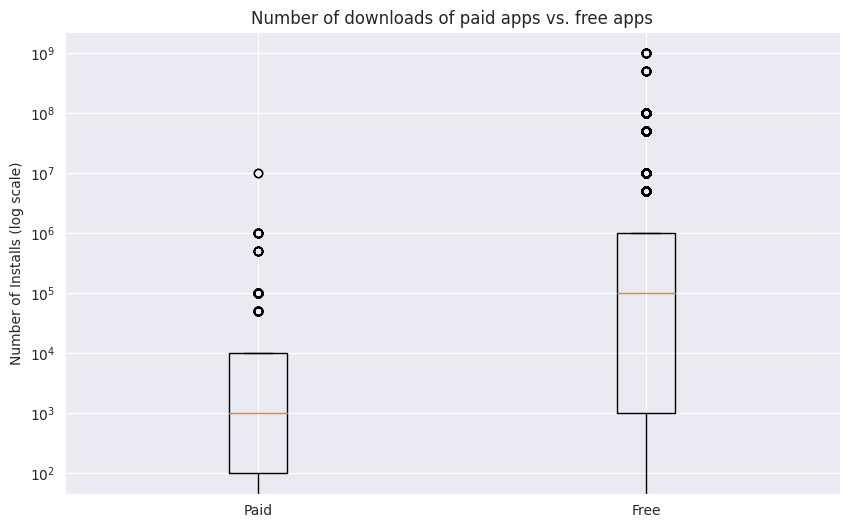

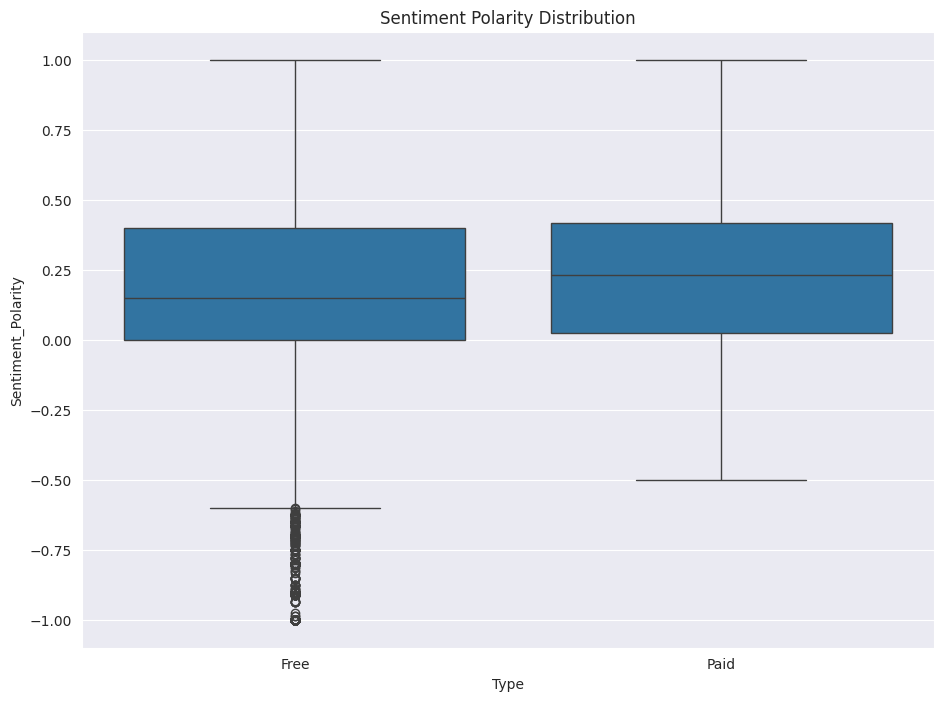

   Unnamed: 0                  App        Category  Rating  Reviews  Size  \
0           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
1           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
2           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
4           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   
5           1  Coloring book moana  ART_AND_DESIGN     3.9      967  14.0   

   Installs  Type  Price Content Rating                     Genres  \
0  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
1  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
2  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
4  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   
5  500000.0  Free    0.0       Everyone  Art & Design;Pretend Play   

       Last Updated Current Ver   Android Ver  \
0  January 15, 2018       2.0.0  4.0.3 and up   
1  January 15, 201

In [ ]:
#s1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings('ignore')

#s2
file_path = '/content/drive/MyDrive/Infobyte/test/apps.csv'
apps = pd.read_csv(file_path)

#s3
print(apps.head())
print(apps.shape)
print(apps.duplicated().any())
print(apps.isna().sum())
print(apps.info())

#s4
chars_to_remove = [r'\,', r'\$', r'\+']
cols_to_clean = ['Installs', 'Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].astype(str).str.replace(char, '', regex=True)
    apps[col] = pd.to_numeric(apps[col])
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.dtypes)

#s5
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

num_apps_in_category = apps['Category'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
plt.bar(num_apps_in_category.index, num_apps_in_category.values)
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.title('Number of Apps per Category')
plt.xticks(rotation=90)
plt.show()

#s6
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

plt.figure(figsize=(15, 8))
plt.hist(apps['Rating'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(avg_app_rating, color='r', linestyle='--', linewidth=2)
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings')
plt.show()

#s7
num_free_vs_paid = apps['Type'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(num_free_vs_paid.index, num_free_vs_paid.values)
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.title('Number of Free vs Paid Apps')
plt.show()

#s8
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'], kind='hex')
plt1.fig.suptitle('App Size vs. Rating', fontsize=15)
plt1.fig.tight_layout()
plt1.fig.subplots_adjust(top=0.95)

#s9
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

plt2 = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'])
plt2.fig.suptitle('Price vs. Rating for Paid Apps', fontsize=15)
plt2.fig.tight_layout()
plt2.fig.subplots_adjust(top=0.95)

#s10
popular_app_cats = apps[apps["Category"].isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                               'MEDICAL', 'TOOLS', 'FINANCE',
                                               'LIFESTYLE', 'BUSINESS'])]

plt.figure(figsize=(15, 8))
ax = sns.stripplot(x='Price', y='Category', data=popular_app_cats, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')
plt.show()

#s11
apps_above_200 = popular_app_cats[['Category', 'App', 'Price']][popular_app_cats['Price'] > 200]
print(apps_above_200)

#s12
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]
plt.figure(figsize=(15, 8))
ax = sns.stripplot(x='Price', y='Category', data=apps_under_100, jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')
plt.show()

#s13
paid_installs = apps[apps['Type'] == 'Paid']['Installs']
free_installs = apps[apps['Type'] == 'Free']['Installs']

plt.figure(figsize=(10, 6))
plt.boxplot([paid_installs, free_installs], labels=['Paid', 'Free'])
plt.yscale('log')
plt.title('Number of downloads of paid apps vs. free apps')
plt.ylabel('Number of Installs (log scale)')
plt.show()

#s14
reviews_df = pd.read_csv('/content/drive/MyDrive/Infobyte/test/user_reviews.csv')
merged_df = pd.merge(apps, reviews_df, on='App', how='inner')

#s15
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

plt.figure(figsize=(11, 8))
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
ax.set_title('Sentiment Polarity Distribution')
plt.show()

print(merged_df.head())
